### Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


##Exploratory Data Analysis

In [ ]:
from google.colab import files
uploaded = files.upload()
df  = pd.read_csv('Bank full S.csv')
df.rename(columns={'y': 'Target'}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


####  Shape of the data

In [ ]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 45211
Total Number of columns : 17


#### Data type of each attribute

In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [ ]:
print(df.job.value_counts())
print('\n',df.marital.value_counts())
print('\n',df.education.value_counts())
print('\n',df.default.value_counts())
print('\n',df.housing.value_counts())
print('\n',df.loan.value_counts())
print('\n',df.contact.value_counts())
print('\n',df.month.value_counts())
print('\n',df.poutcome.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

 no     44396
yes      815
Name: default, dtype: int64

 yes    25130
no     20081
Name: housing, dtype: int64

 no     37967
yes     7244
Name: loan, dtype: int64

 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

 may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

 unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome

In [ ]:
replaceStruct = {
                "job" :      {"unknown": -1, "blue-collar": 1, "management":2 , "technician": 3, "admin.": 4,"services": 5,
                         "retired": 6, "self-employed": 7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10,
                         "student": 11},
                "marital":   {"single": 1, "married": 2 ,"divorced": 3},
                "education": {"unknown":-1, "primary": 1, "secondary": 2 ,"tertiary": 3},
                "default":   {"no": 0, "yes": 1},
                "housing":   {"no": 0, "yes": 1},
                "loan":      {"no": 0, "yes": 1},
                "contact":   {"unknown": -1 , "cellular": 1, "telephone": 2},
                "month":     {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                "poutcome":  {"unknown": -1, "failure": 0, "success": 1, "other": 2},
                "Target":    {"no": 0, "yes": 1}
                    }

df=df.replace(replaceStruct)
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,2,3,0,2143,1,0,-1,5,5,261,1,-1,0,-1,0
1,44,3,1,2,0,29,1,0,-1,5,5,151,1,-1,0,-1,0
2,33,8,2,2,0,2,1,1,-1,5,5,76,1,-1,0,-1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [ ]:
df.isnull().values.any()

False

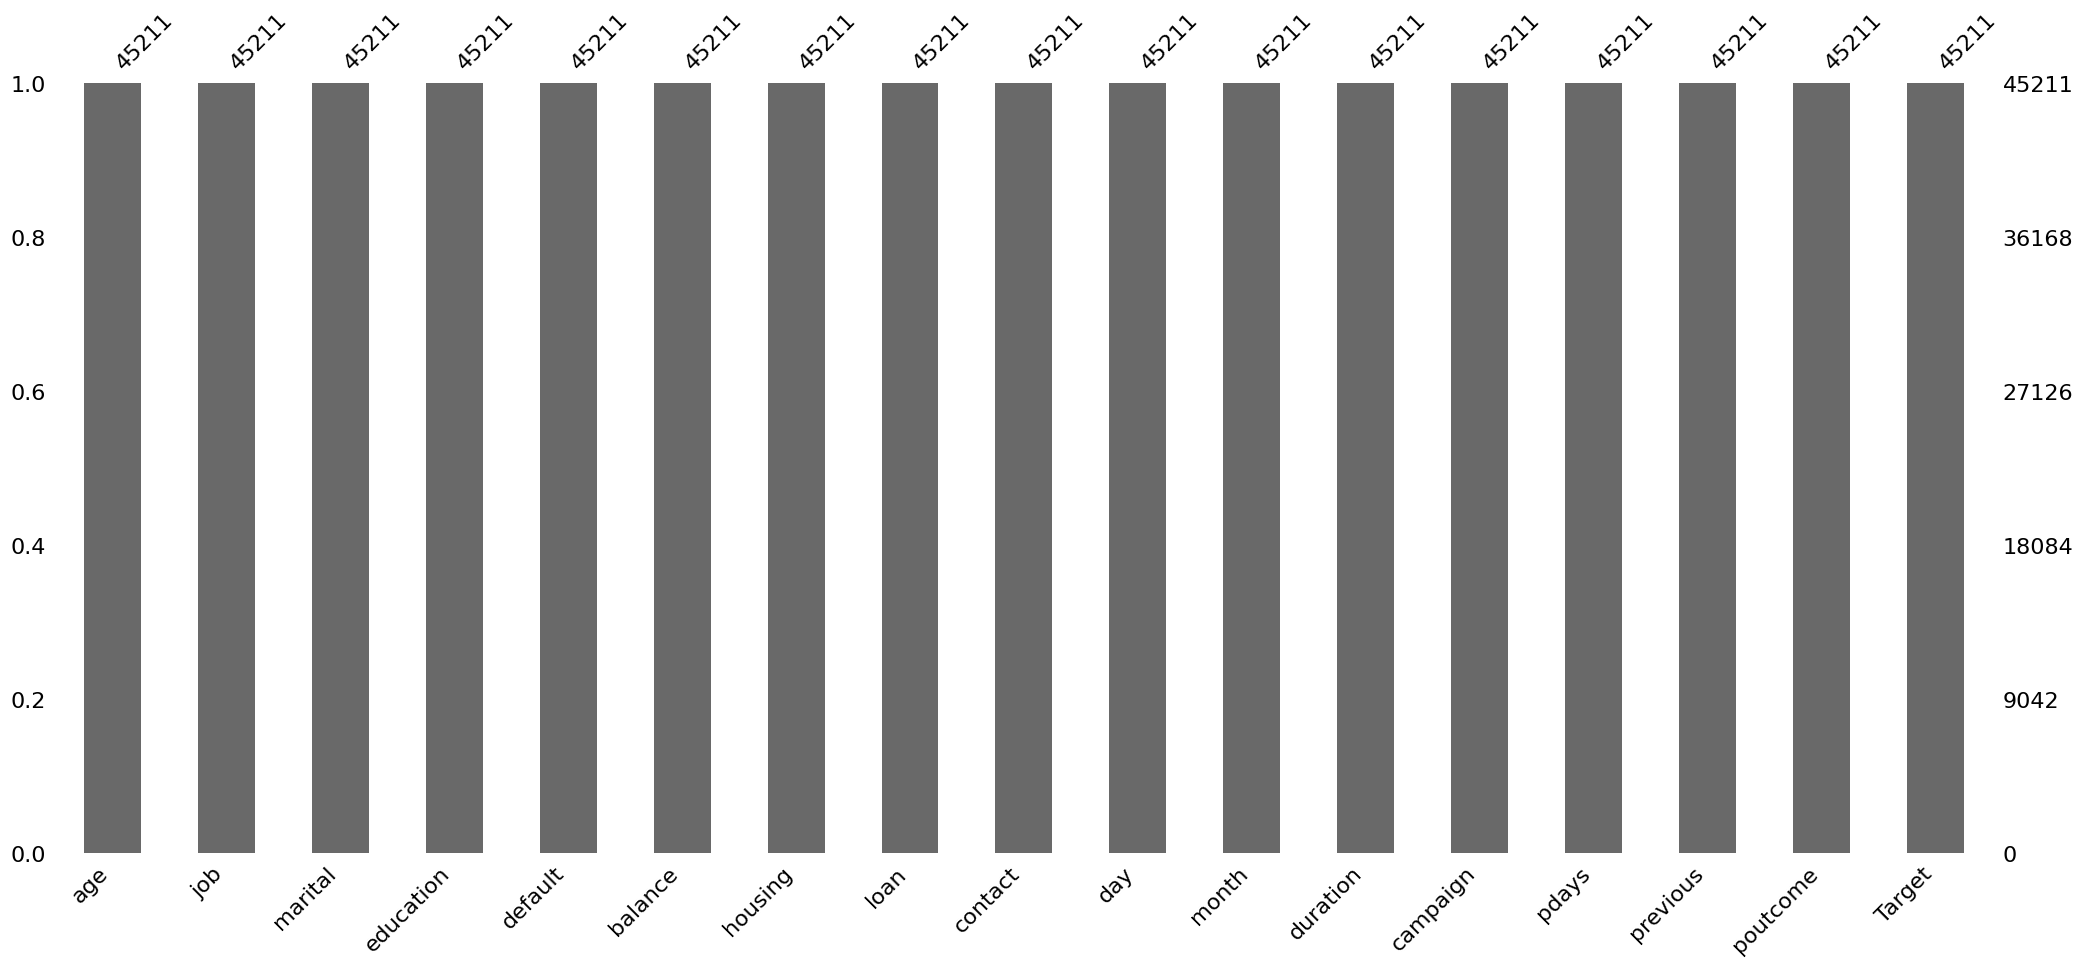

In [ ]:
import missingno as ms
ms.bar(df)
plt.show()

In [ ]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

In [ ]:
for value in df.columns:
     print(value,":", sum(df[value] == '?'))

age : 0
job : 0
marital : 0
education : 0
default : 0
balance : 0
housing : 0
loan : 0
contact : 0
day : 0
month : 0
duration : 0
campaign : 0
pdays : 0
previous : 0
poutcome : 0
Target : 0


###  Descriptive Statistics

In [ ]:
df_transpose = df.describe().T
df_transpose

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [ ]:
df_transpose[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
age,18.0,33.0,39.0,48.0,95.0
balance,-8019.0,72.0,448.0,1428.0,102127.0
day,1.0,8.0,16.0,21.0,31.0
duration,0.0,103.0,180.0,319.0,4918.0
campaign,1.0,1.0,2.0,3.0,63.0
pdays,-1.0,-1.0,-1.0,-1.0,871.0
previous,0.0,0.0,0.0,0.0,275.0


### Checking the presence of outliers

<Axes: >

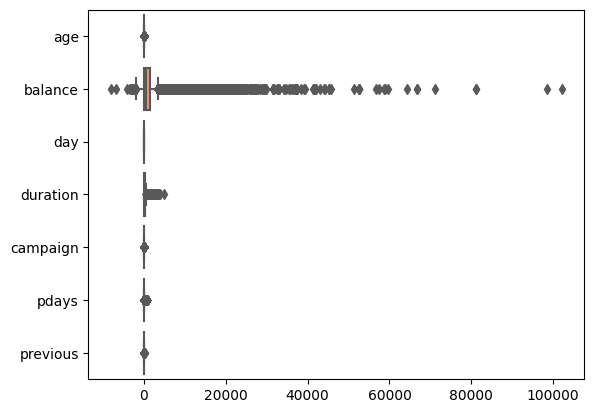

In [ ]:
sns.boxplot(data=df, orient="h", palette="Set2", dodge=False)

<Axes: >

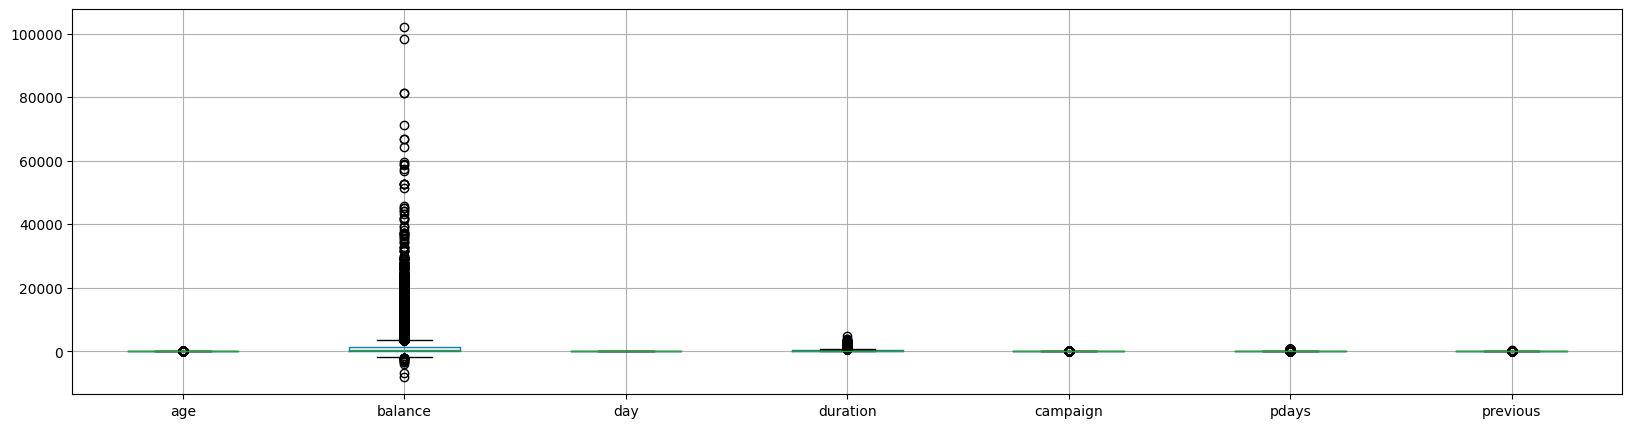

In [ ]:
df.boxplot(return_type='axes', figsize=(20,5))

In [ ]:
Q1 =  df['balance'].quantile(0.25) # 1º Quartile
Q3 =  df['balance'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range
print('Interquartile range = ', IQR)
print('Numerber of outliers in balance column below the lower whisker :', df[df['balance'] < (Q1-(1.5*IQR))]['balance'].count())
print('Numerber of outliers above balance column the uper whisker  :', df[df['balance'] > (Q3+(1.5*IQR))]['balance'].count())

Interquartile range =  1356.0
Numerber of outliers in balance column below the lower whisker : 17
Numerber of outliers above balance column the uper whisker  : 4712


In [ ]:
for i in df.describe().columns:
    Q1 = df.describe().at['25%', i]
    Q3 = df.describe().at['75%', i]
    IQR = Q3-Q1
    LTV = Q1 - 1.5 * IQR # lower bound
    UTV = Q3 + 1.5 * IQR # upper bound
    print('Column Name                                         :', i)
    print('Interquartile range IQR                             :', IQR)
    print('Numerber of outliers below the lower whisker        :', df[df[i] < LTV][i].count())
    print('Numerber of outliers above the upper whisker         :', df[df[i] > UTV][i].count())
    print('Total Numbers of Ourliers                           :', (df[df[i] < LTV][i].count()) + (df[df[i] > UTV][i].count()))

    print('\n')

Column Name                                         : age
Interquartile range IQR                             : 15.0
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 487
Total Numbers of Ourliers                           : 487


Column Name                                         : balance
Interquartile range IQR                             : 1356.0
Numerber of outliers below the lower whisker        : 17
Numerber of outliers above the upper whisker         : 4712
Total Numbers of Ourliers                           : 4729


Column Name                                         : day
Interquartile range IQR                             : 13.0
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 0
Total Numbers of Ourliers                           : 0


Column Name                                         : duration
Interquartile range IQR                             : 21

##Principal Component analysis

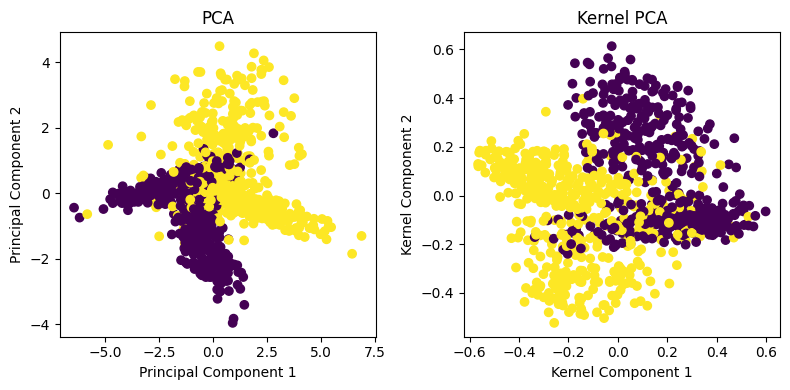

PCA Results:
[[-2.13999344 -0.06385112]
 [ 2.23444724  0.71040528]
 [ 0.71766412  1.36570696]
 ...
 [-3.64443662 -0.26061413]
 [ 1.17247609 -2.40280077]
 [-0.54661144 -0.66509664]]

Kernel PCA Results:
[[ 0.37501894 -0.06512978]
 [-0.35325126 -0.11172177]
 [-0.17100086 -0.24473815]
 ...
 [ 0.30915251 -0.0950467 ]
 [-0.18385571  0.45920939]
 [ 0.07345258  0.14770052]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform KPCA
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X)

# Plot PCA results
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot KPCA results
plt.subplot(122)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis')
plt.title('Kernel PCA')
plt.xlabel('Kernel Component 1')
plt.ylabel('Kernel Component 2')

plt.tight_layout()
plt.show()

print("PCA Results:")
print(X_pca)

print("\nKernel PCA Results:")
print(X_kpca)

**Data Visualization**

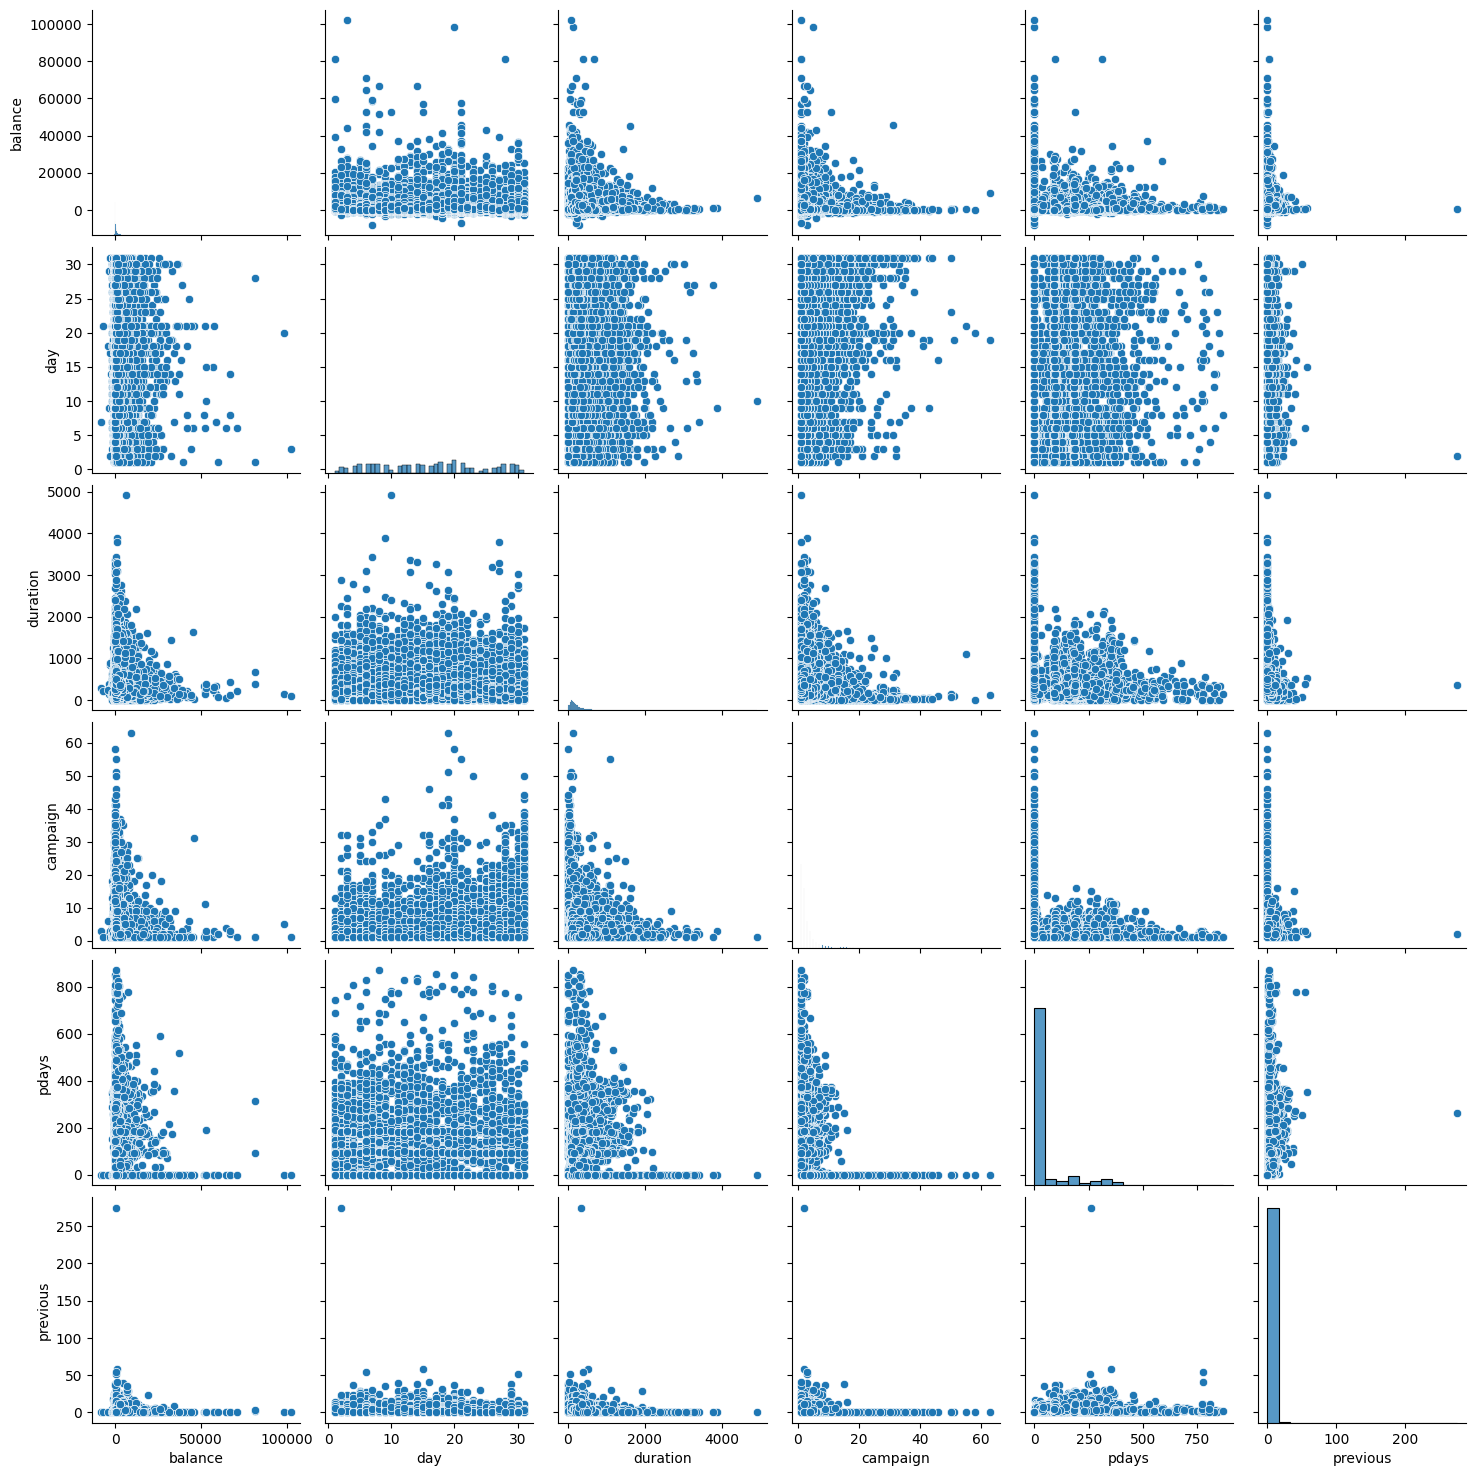

In [ ]:
sns.pairplot(df.iloc[:,1:])

### Checking the ratio of subscribers and non-subscribers in the given dataset

In [ ]:
subscriber_counts = pd.DataFrame(df["Target"].value_counts()).reset_index()
subscriber_counts.columns =["Labels","Target"]
subscriber_counts

,Labels,Target
0,0,39922
1,1,5289


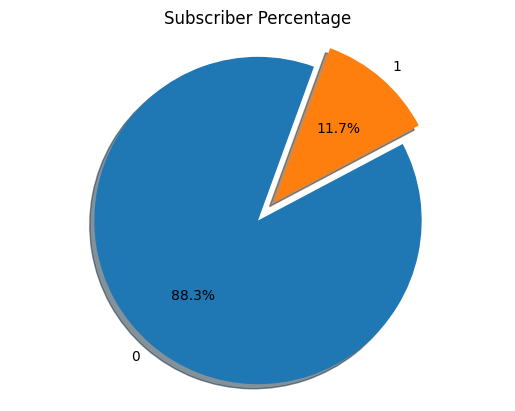

In [ ]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(subscriber_counts["Target"], explode=explode, labels=subscriber_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Subscriber Percentage")
plt.show()

### Age Distrubution

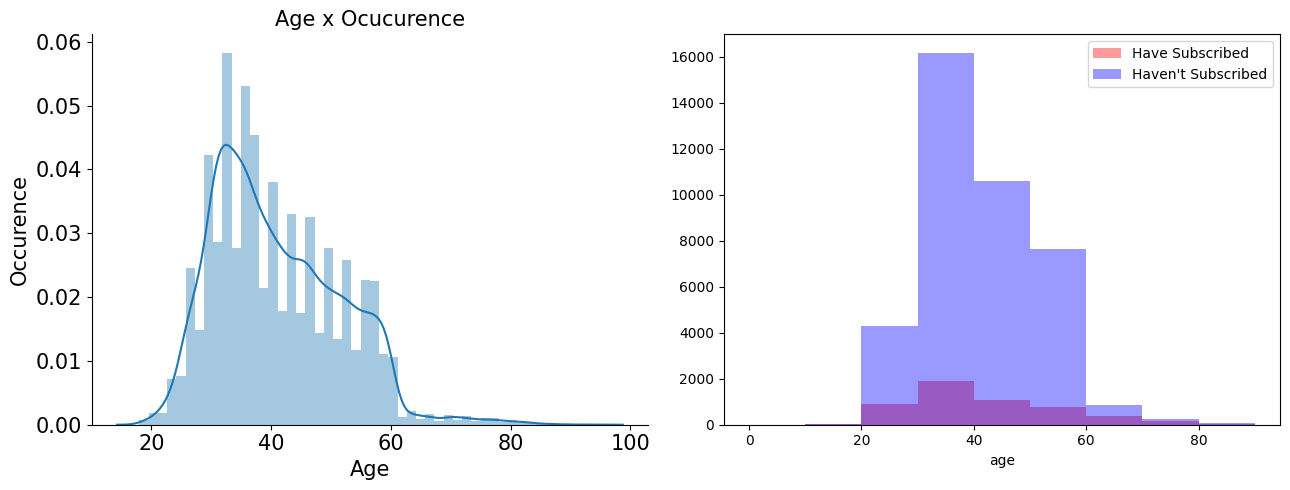

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

sns.distplot(df['age'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Occurence', fontsize=15)
ax1.set_title('Age x Ocucurence', fontsize=15)
ax1.tick_params(labelsize=15)

#Age group
bins = range(0, 100, 10)
ax2 = sns.distplot(df.age[df.Target==1], color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.age[df.Target==0], ax=ax2,
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Job Distribution

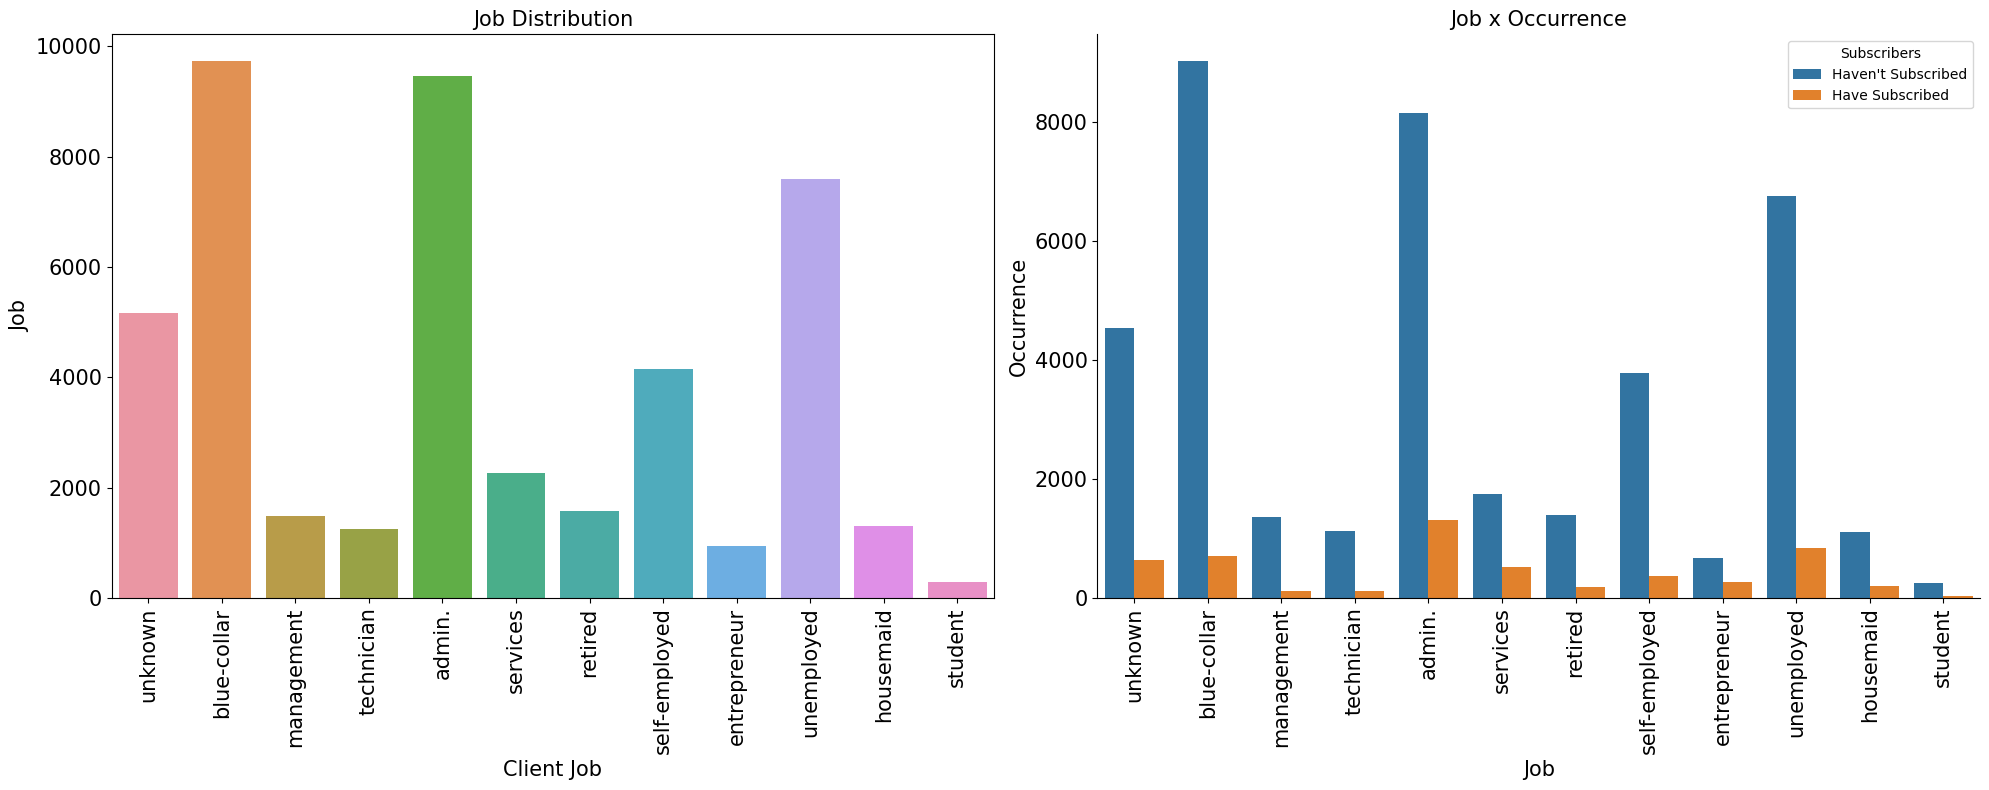

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
fig.set_size_inches(20, 8)

sns.countplot(x='job', data=df, ax=ax1)
ax1.set_xlabel('Client Job', fontsize=15)
ax1.set_ylabel('Job', fontsize=15)
ax1.set_title('Job Distribution', fontsize=15)
ax1.tick_params(labelsize=15)
ax1.set_xticklabels(replaceStruct['job'], rotation=90)

sns.countplot(x='job', data=df, hue='Target', ax=ax2)
sns.despine(ax=ax2)
ax2.set_xlabel('Job', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Job x Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(replaceStruct['job'], rotation=90)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

### Marital Distribution

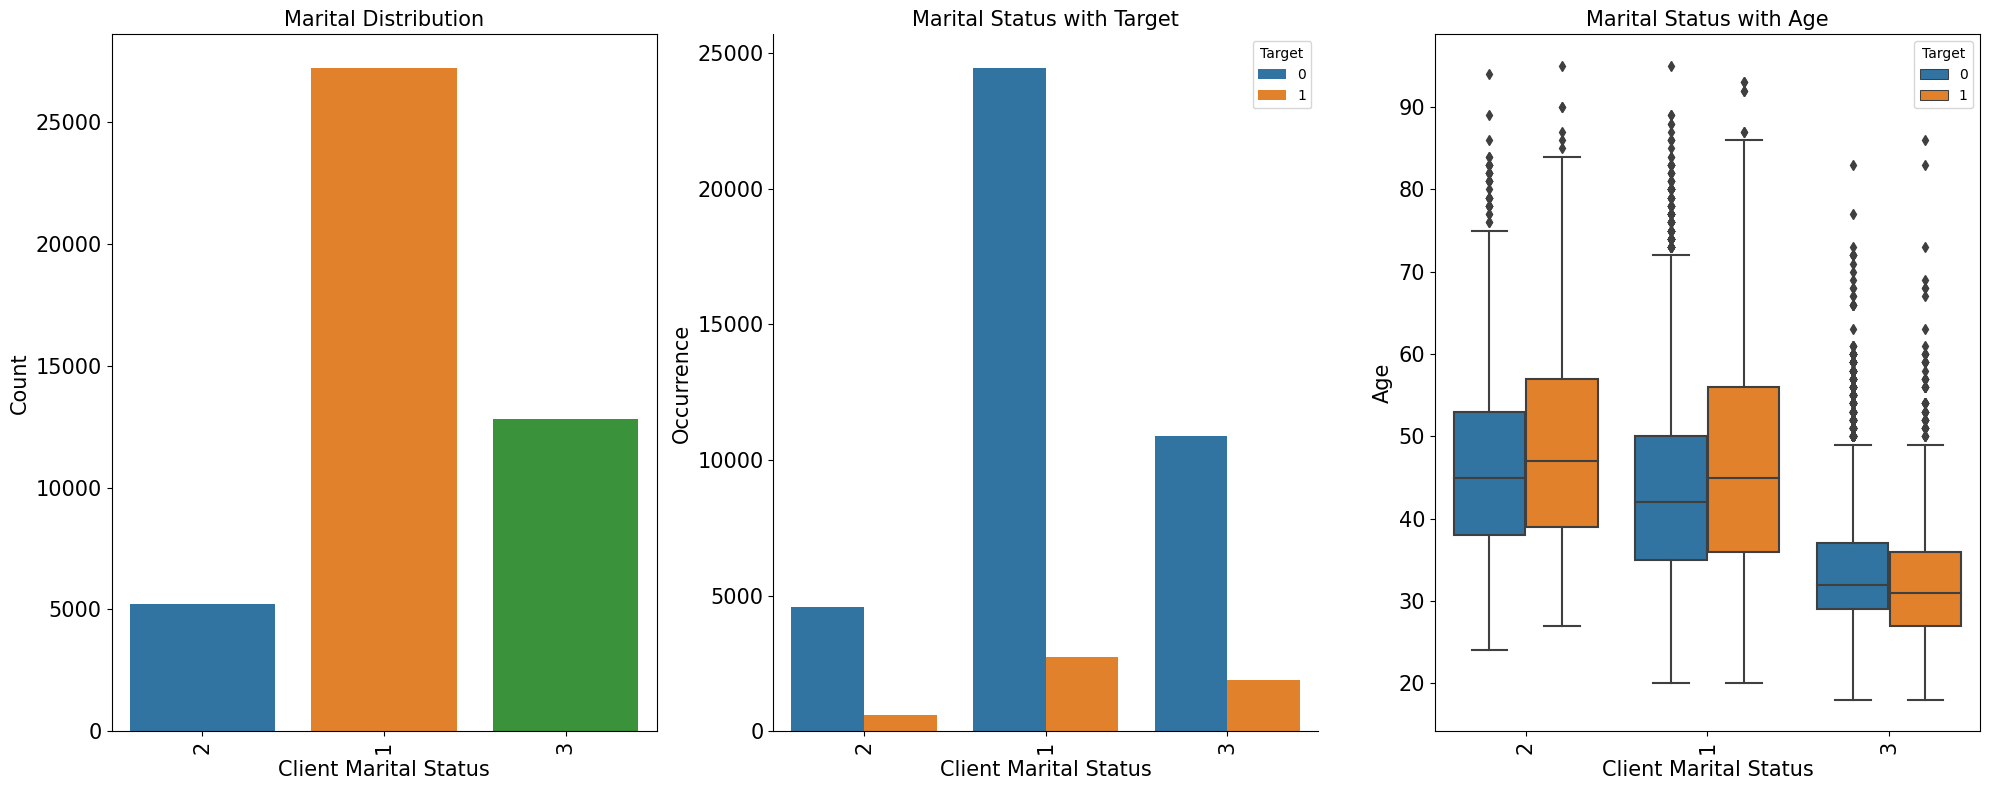

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
fig.set_size_inches(20, 8)

sns.countplot(x='marital', data=df, ax=ax1)
ax1.set_xlabel('Client Marital Status', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Marital Distribution', fontsize=15)
ax1.set_xticklabels(df['marital'].unique(), rotation=90)
ax1.tick_params(labelsize=15)

sns.countplot(x='marital', data=df, hue='Target', ax=ax2)
sns.despine(ax=ax2)
ax2.set_xlabel('Client Marital Status', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Marital Status with Target', fontsize=15)
ax2.set_xticklabels(df['marital'].unique(), rotation=90)
ax2.tick_params(labelsize=15)

sns.boxplot(x="marital", y='age', hue="Target", data=df, ax=ax3)
ax3.set_xlabel('Client Marital Status', fontsize=15)
ax3.set_ylabel('Age', fontsize=15)
ax3.set_title('Marital Status with Age', fontsize=15)
ax3.set_xticklabels(df['marital'].unique(), rotation=90)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

### Education Distribution

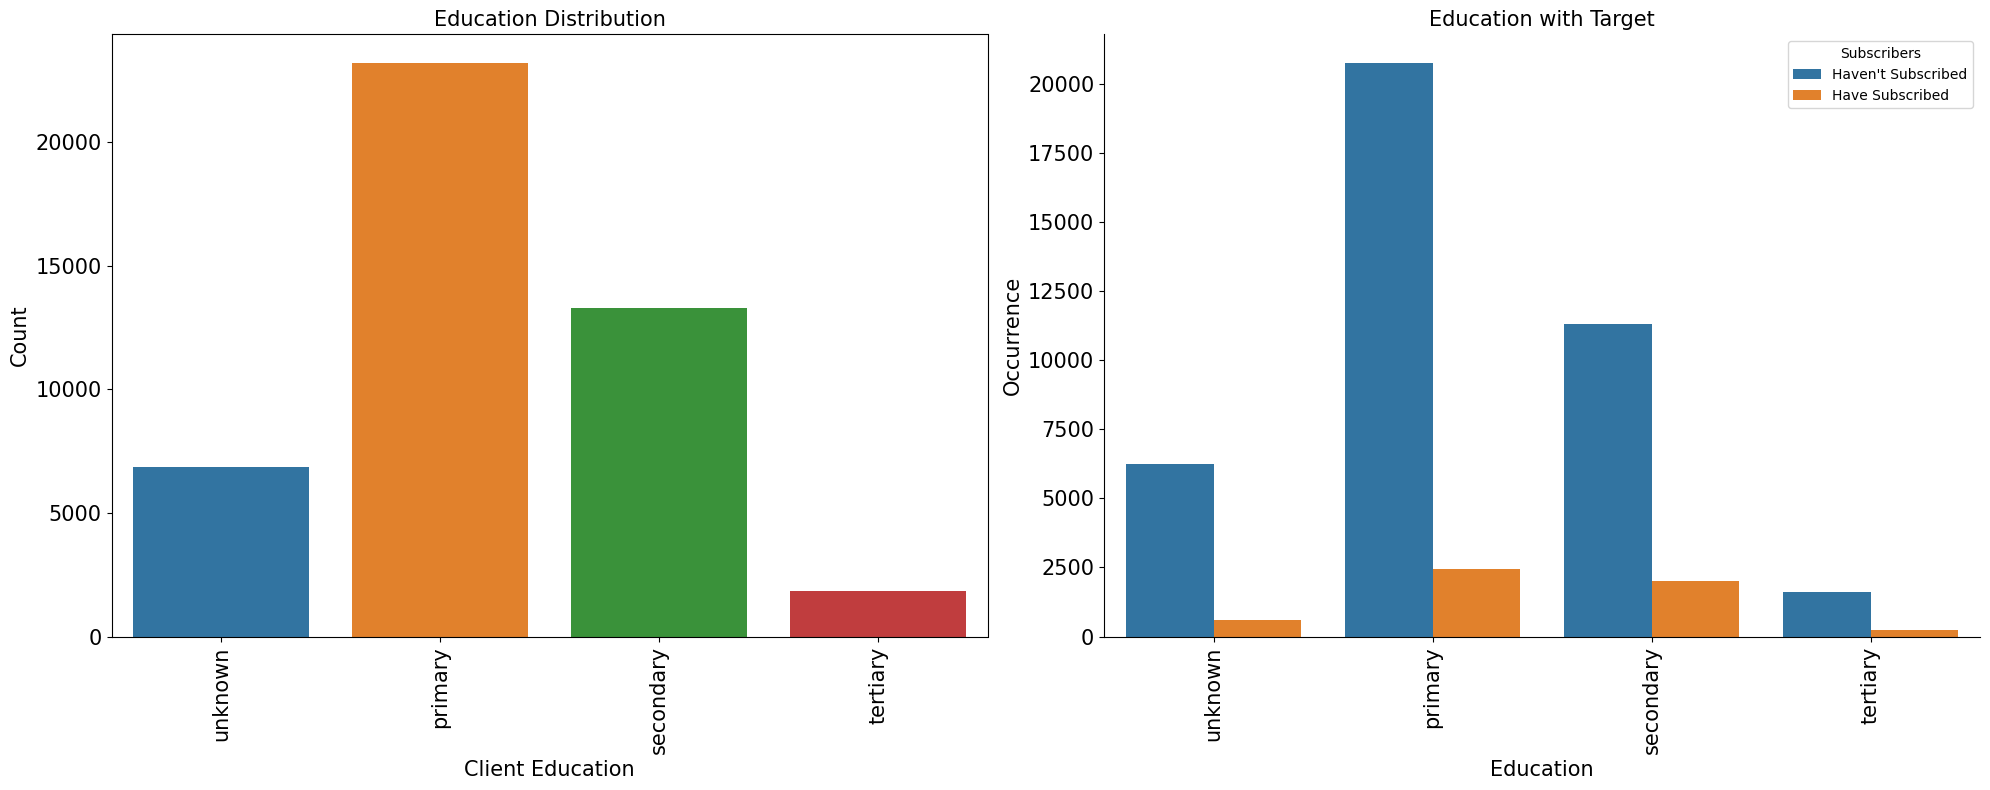

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
fig.set_size_inches(20, 8)

sns.countplot(x='education', data=df, ax=ax1)
ax1.set_xlabel('Client Education', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Education Distribution', fontsize=15)
ax1.set_xticklabels(replaceStruct['education'], rotation=90)
ax1.tick_params(labelsize=15)

sns.countplot(x='education', data=df, hue='Target', ax=ax2)
sns.despine(ax=ax2)
ax2.set_xlabel('Education', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Education with Target', fontsize=15)
ax2.set_xticklabels(replaceStruct['education'], rotation=90)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])
plt.show()

### Balance Distribution

Text(0.5, 1.0, 'balance Distribution')

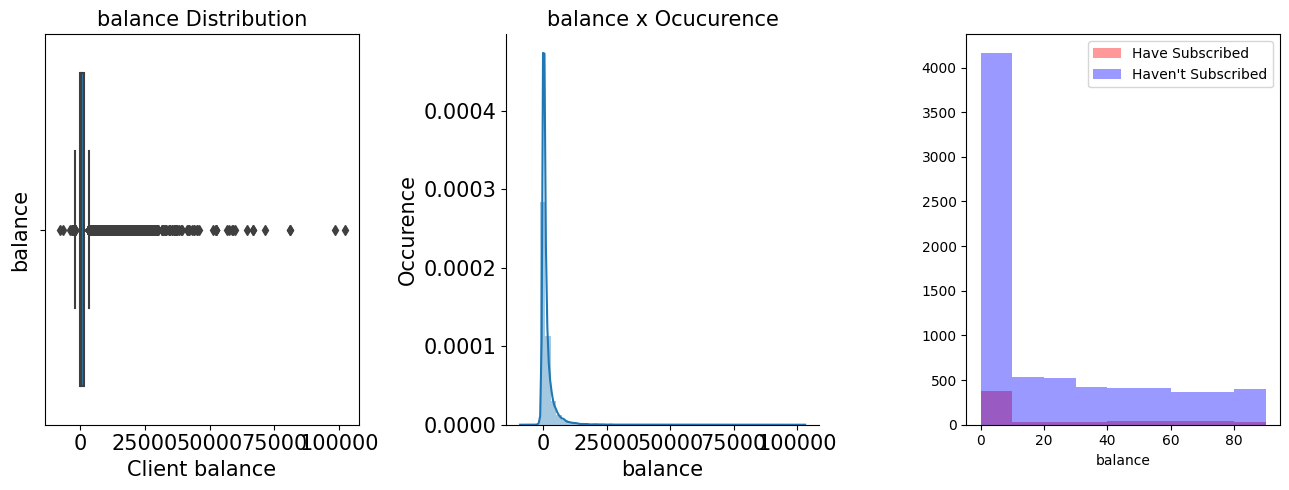

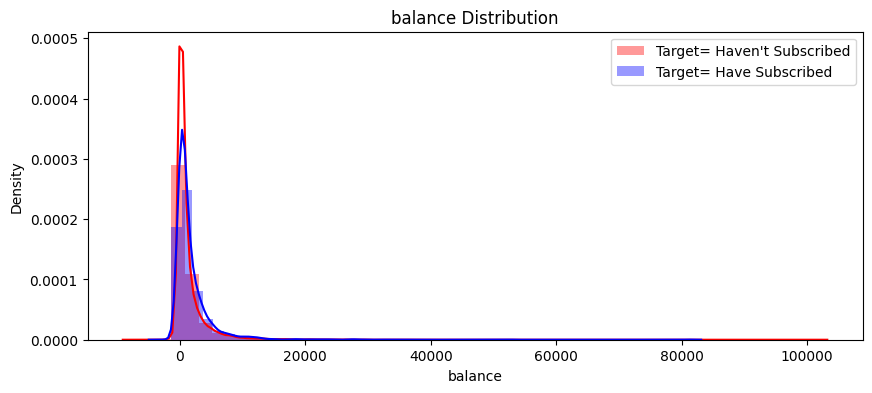

In [ ]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
sns.boxplot(x = 'balance', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('Client balance', fontsize=15)
ax1.set_ylabel('balance', fontsize=15)
ax1.set_title('balance Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['balance'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('balance', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('balance x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

bins = range(0, 100, 10)
ax3 = sns.distplot(df.balance[df.Target==1], color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.balance[df.Target==0], ax=ax3, color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

plt.figure(figsize=(10,4))
sns.distplot(df[df["Target"] == 0]['balance'], color = 'r',label="Target= Haven't Subscribed")
sns.distplot(df[df["Target"] == 1]['balance'], color = 'b',label='Target= Have Subscribed')
plt.legend()
plt.title("balance Distribution")

### DEFAULT, HOUSING, LOAN Distribution

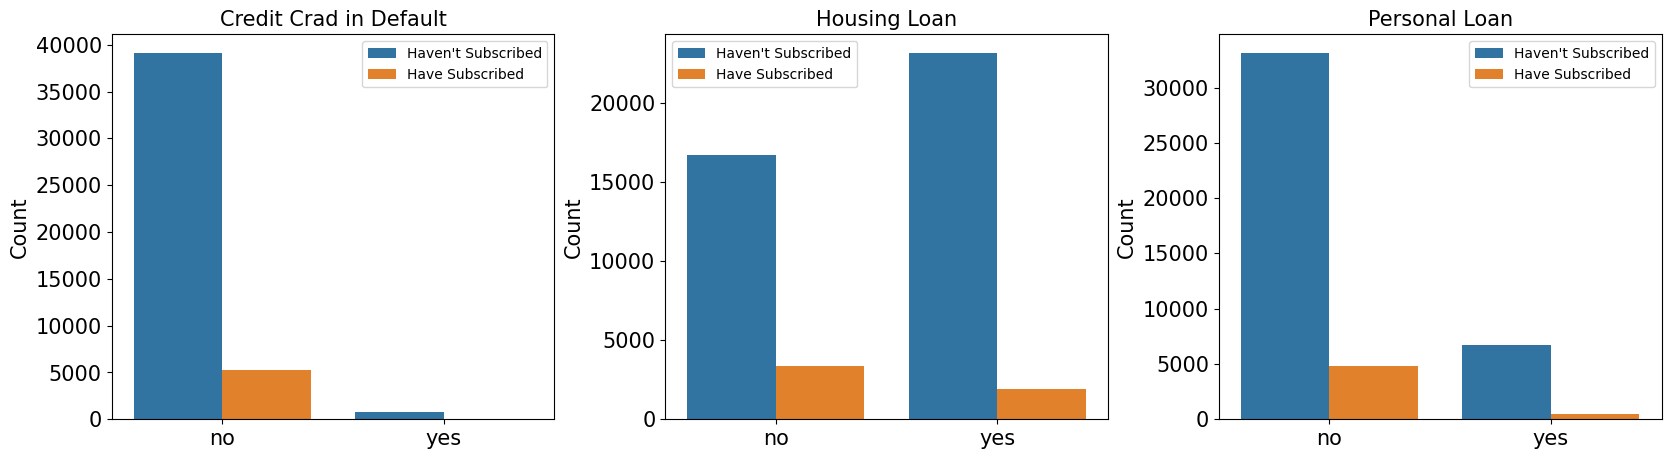

In [ ]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
sns.countplot(x = 'default', data = df, hue='Target', ax = ax1)
ax1.set_title('Credit Crad in Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)
ax1.set_xticklabels(replaceStruct['default'])
ax1.legend(["Haven't Subscribed", "Have Subscribed"])
# Housing, has housing loan ?
sns.countplot(x = 'housing', data = df,  hue='Target', ax = ax2)
ax2.set_title('Housing Loan', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(replaceStruct['housing'])
ax2.legend(["Haven't Subscribed", "Have Subscribed"])

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = df,  hue='Target', ax = ax3)
ax3.set_title('Personal Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)
ax3.set_xticklabels(replaceStruct['loan'])
ax3.legend(["Haven't Subscribed", "Have Subscribed"])

plt.subplots_adjust(wspace=0.25)


### Contact Distribution :-

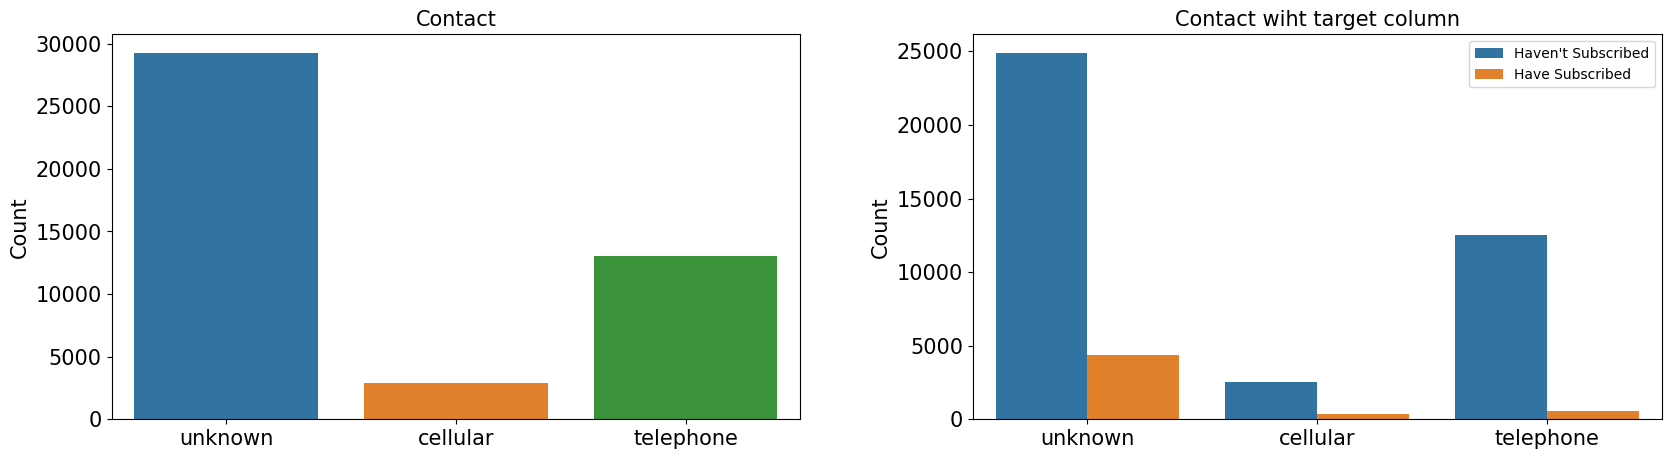

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.countplot(x = 'contact', data = df,  ax = ax1)
ax1.set_title('Contact', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.set_xticklabels(replaceStruct['contact'])
ax1.tick_params(labelsize=15)

sns.countplot(x = 'contact', data = df, hue='Target', ax = ax2)
ax2.set_title('Contact wiht target column', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(replaceStruct['contact'])
ax2.legend(["Haven't Subscribed", "Have Subscribed"])
plt.subplots_adjust(wspace=0.25)


### Duration Distribution

[Text(0, 0, 'no'), Text(1, 0, 'yes')]

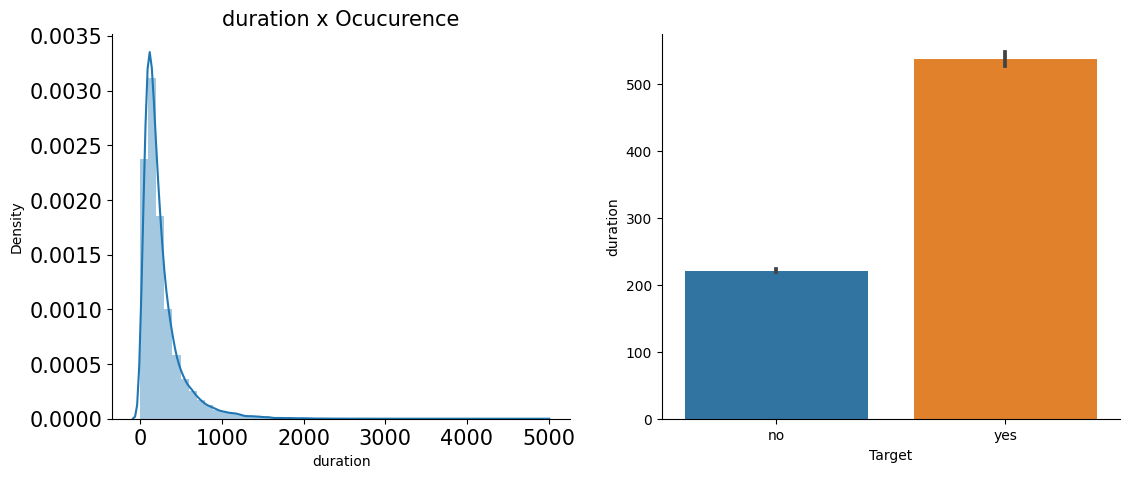

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.distplot(df['duration'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_title('duration x Ocucurence', fontsize=15)
ax1.tick_params(labelsize=15)

sns.barplot(x="Target", y="duration", data=df, ax = ax2)
sns.despine(ax = ax2)
ax2.set_xticklabels(replaceStruct['Target'])

### Campaign Distrbution

[Text(0, 0, 'no'), Text(1, 0, 'yes')]

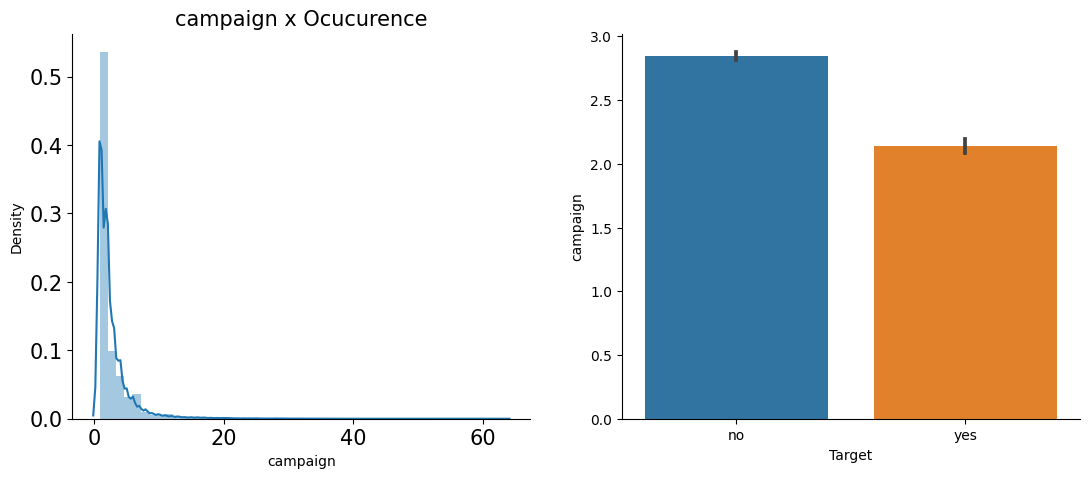

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.distplot(df['campaign'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_title('campaign x Ocucurence', fontsize=15)
ax1.tick_params(labelsize=15)

sns.barplot(x="Target", y="campaign", data=df, ax = ax2)
sns.despine(ax = ax2)
ax2.set_xticklabels(replaceStruct['Target'])

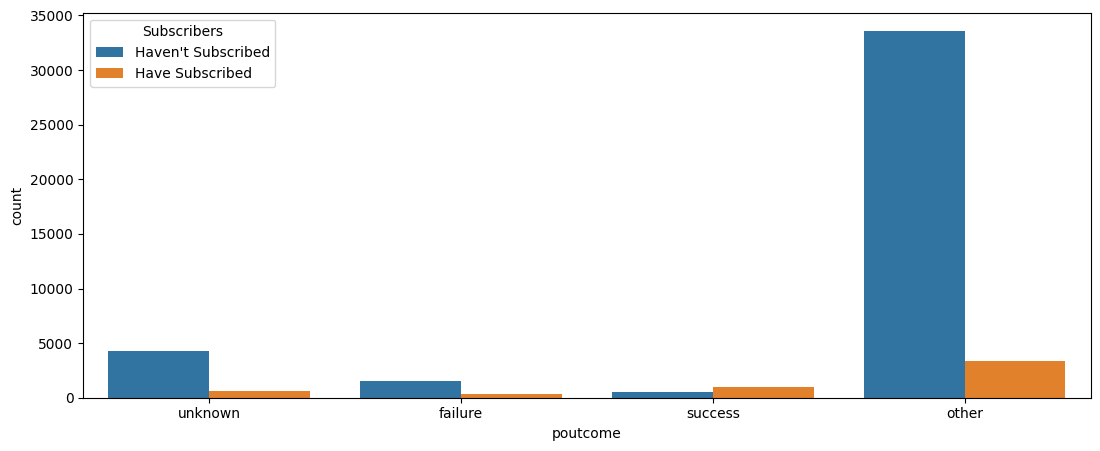

In [ ]:
fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 5))
sns.countplot(x = 'poutcome', data=df, hue='Target')
ax.set_xticklabels(replaceStruct['poutcome'])
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

## Correlation using Heatmap

<Axes: title={'center': 'Correlation of Attributes'}>

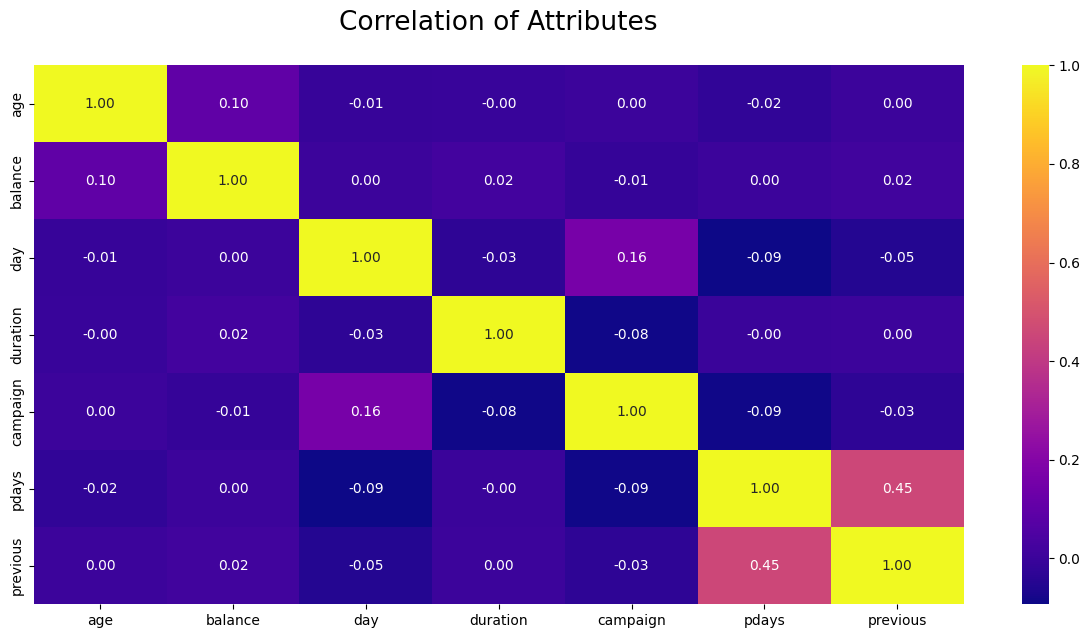

In [ ]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

## Model Building

In [ ]:
df = df.drop(['contact'], axis=1)

In [ ]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,2,3,0,2143,1,0,5,5,261,1,-1,0,-1,0


In [ ]:
df['poutcome'].head(4)

0   -1
1   -1
2   -1
3   -1
Name: poutcome, dtype: category
Categories (4, int64): [0, 2, 1, -1]

In [ ]:
df.loc[df['poutcome'] == -1, 'poutcome'] = 2
df['poutcome'].head(4)

0    2
1    2
2    2
3    2
Name: poutcome, dtype: category
Categories (4, int64): [0, 2, 1, -1]

In [ ]:

df.head(1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,2,3,0,2143,1,0,5,5,261,1,-1,0,2,0


In [ ]:
oneHotCols=["job", "marital", "poutcome"]
df=pd.get_dummies(df, columns=oneHotCols)

In [ ]:
df.head(1)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_3,job_9,job_-1,marital_3,marital_2,marital_1,poutcome_0,poutcome_2,poutcome_1,poutcome_-1
0,58,3,0,2143,1,0,5,5,261,1,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
df.shape

(45211, 32)

In [ ]:
df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'Target', 'job_4',
       'job_1', 'job_8', 'job_10', 'job_2', 'job_6', 'job_7', 'job_5',
       'job_11', 'job_3', 'job_9', 'job_-1', 'marital_3', 'marital_2',
       'marital_1', 'poutcome_0', 'poutcome_2', 'poutcome_1', 'poutcome_-1'],
      dtype='object')

## Spliting the data into training and test set ##

In [ ]:
X = df.drop('Target', axis=1)
y = df[['Target']]
df.head(1)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_3,job_9,job_-1,marital_3,marital_2,marital_1,poutcome_0,poutcome_2,poutcome_1,poutcome_-1
0,58,3,0,2143,1,0,5,5,261,1,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
print('x train data {}'.format(x_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (31647, 31)
y train data (31647, 1)
x test data  (13564, 31)
y test data  (13564, 1)


In [ ]:
X_train_scaled = preprocessing.scale(x_train)
X_test_scaled = preprocessing.scale(X_test)

X_train = X_train_scaled
X_test  = X_test_scaled

In [ ]:
# prepare cross validation
seed = 7
kfold = model_selection.KFold(n_splits=10, shuffle=True)

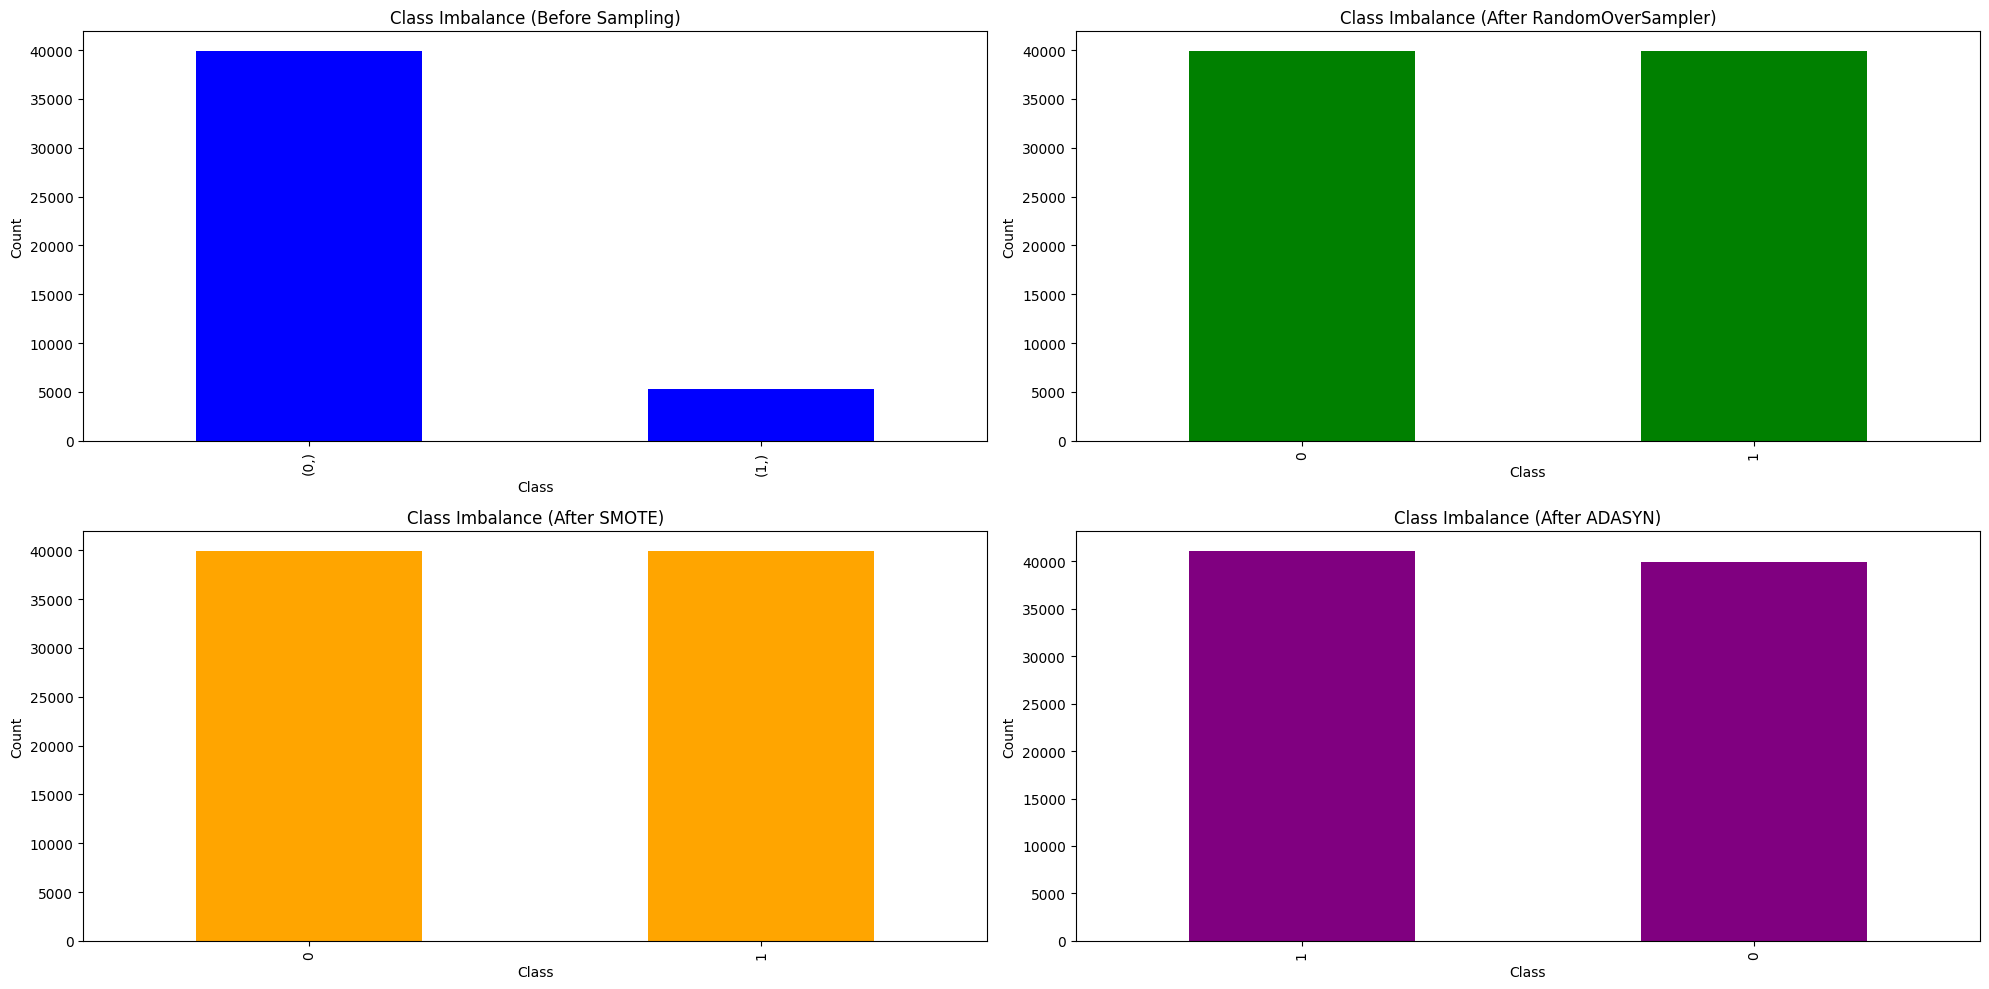

Class Counts (Before Sampling):
 Target
0         39922
1          5289
dtype: int64

Class Counts (After RandomOverSampler):
 0    39922
1    39922
dtype: int64

Class Counts (After SMOTE):
 0    39922
1    39922
dtype: int64

Class Counts (After ADASYN):
 1    41103
0    39922
dtype: int64

Class Counts (After RandomUnderSampler):
 0    5289
1    5289
dtype: int64


In [ ]:
X_encoded = pd.get_dummies(X, drop_first=True)

class_counts_before = y.value_counts()

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_encoded, y.values.ravel())

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_encoded, y.values.ravel())

adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_encoded, y.values.ravel())

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_encoded, y.values.ravel())

class_counts_after_ros = pd.Series(y_ros).value_counts()
class_counts_after_smote = pd.Series(y_smote).value_counts()
class_counts_after_adasyn = pd.Series(y_adasyn).value_counts()
class_counts_after_rus = pd.Series(y_rus).value_counts()

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
class_counts_before.plot(kind='bar', color='blue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Imbalance (Before Sampling)')

plt.subplot(2, 2, 2)
class_counts_after_ros.plot(kind='bar', color='green')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Imbalance (After RandomOverSampler)')

plt.subplot(2, 2, 3)
class_counts_after_smote.plot(kind='bar', color='orange')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Imbalance (After SMOTE)')

plt.subplot(2, 2, 4)
class_counts_after_adasyn.plot(kind='bar', color='purple')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Imbalance (After ADASYN)')
plt.tight_layout()
plt.show()

print("Class Counts (Before Sampling):\n", class_counts_before)
print("\nClass Counts (After RandomOverSampler):\n", class_counts_after_ros)
print("\nClass Counts (After SMOTE):\n", class_counts_after_smote)
print("\nClass Counts (After ADASYN):\n", class_counts_after_adasyn)
print("\nClass Counts (After RandomUnderSampler):\n", class_counts_after_rus)

## Logistic Regression

In [ ]:
LogReg = LogisticRegression(solver = 'lbfgs')
LogReg.fit(X_train, y_train.values.ravel())

LogReg_y_pred               = LogReg.predict(X_test)
LogReg_Score                = LogReg.score(X_test, y_test)

LogReg_ScoreAccuracy        = accuracy_score(y_test, LogReg_y_pred)

LogReg_PrecisonScore        = precision_score(y_test, LogReg_y_pred)
LogReg_RecollScore          = recall_score(y_test, LogReg_y_pred)
LogReg_F1                   = f1_score(y_test, LogReg_y_pred)

cross_validation_result = model_selection.cross_val_score(LogReg, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

base_model_results = pd.DataFrame([['Logistic Regression', LogReg_ScoreAccuracy, LogReg_PrecisonScore,
                                LogReg_RecollScore, LogReg_F1, cross_validation_result.mean(), cross_validation_result.std()]],
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])

print('\nLogistic Regression classification Report : \n',metrics.classification_report(y_test, LogReg_y_pred))


Logistic Regression classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     12030
           1       0.63      0.32      0.42      1534

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564



## K-Nearest Neighbors (K-NN)

In [ ]:
Knn = KNeighborsClassifier(n_neighbors=9, weights = 'uniform', metric='euclidean')
Knn.fit(X_train, y_train.values.ravel())

# Predicting for test set
Knn_y_pred               = Knn.predict(X_test)
Knn_Score                = Knn.score(X_test, y_test)

Knn_ScoreAccuracy        = accuracy_score(y_test, Knn_y_pred)
Knn_PrecisonScore        = precision_score(y_test, Knn_y_pred)
Knn_RecollScore          = recall_score(y_test, Knn_y_pred)
Knn_F1                   = f1_score(y_test, Knn_y_pred)

cross_validation_result = model_selection.cross_val_score(Knn, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
knn_models_results = pd.DataFrame([['K-Nearest Neighbors', Knn_ScoreAccuracy, Knn_PrecisonScore,
                                Knn_RecollScore, Knn_F1, cross_validation_result.mean(), cross_validation_result.std()]],
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(knn_models_results, ignore_index = True)

print('\nK-Nearest Neighbors (K-NN) classification Report : \n',metrics.classification_report(y_test, Knn_y_pred))


K-Nearest Neighbors (K-NN) classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12030
           1       0.61      0.28      0.38      1534

    accuracy                           0.90     13564
   macro avg       0.76      0.63      0.66     13564
weighted avg       0.88      0.90      0.88     13564



## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train.values.ravel())

rf_y_pred = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

cross_validation_result = model_selection.cross_val_score(rf, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
rf_model_results = pd.DataFrame([['Random Forest', rf_accuracy, rf_precision, rf_recall, rf_f1, cross_validation_result.mean(), cross_validation_result.std()]],
                              columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(rf_model_results, ignore_index=True)

print('\nRandom Forest Classification Report:\n', metrics.classification_report(y_test, rf_y_pred))



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     12030
           1       0.65      0.35      0.46      1534

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



##SMOTE/Over and Under Sample

## Lgistic Regression

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Perform SMOTE
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Perform Random Oversampling
ros = RandomOverSampler(random_state=1)
X_train_oversample, y_train_oversample = ros.fit_resample(X_train, y_train)

# Perform Random Undersampling
rus = RandomUnderSampler(random_state=1)
X_train_undersample, y_train_undersample = rus.fit_resample(X_train, y_train)

# Logistic Regression with SMOTE
LogReg_smote = LogisticRegression(solver='lbfgs')
LogReg_smote.fit(X_train_smote, y_train_smote)

# Predicting for test set with SMOTE
LogReg_smote_y_pred = LogReg_smote.predict(X_test)

# Calculate evaluation metrics with SMOTE
LogReg_smote_accuracy = accuracy_score(y_test, LogReg_smote_y_pred)
LogReg_smote_precision = precision_score(y_test, LogReg_smote_y_pred)
LogReg_smote_recall = recall_score(y_test, LogReg_smote_y_pred)
LogReg_smote_f1 = f1_score(y_test, LogReg_smote_y_pred)
LogReg_smote_cm = confusion_matrix(y_test, LogReg_smote_y_pred)
LogReg_smote_report = classification_report(y_test, LogReg_smote_y_pred)

# Logistic Regression with Random Oversampling
LogReg_oversample = LogisticRegression(solver='lbfgs')
LogReg_oversample.fit(X_train_oversample, y_train_oversample)

# Predicting for test set with Random Oversampling
LogReg_oversample_y_pred = LogReg_oversample.predict(X_test)

# Calculate evaluation metrics with Random Oversampling
LogReg_oversample_accuracy = accuracy_score(y_test, LogReg_oversample_y_pred)
LogReg_oversample_precision = precision_score(y_test, LogReg_oversample_y_pred)
LogReg_oversample_recall = recall_score(y_test, LogReg_oversample_y_pred)
LogReg_oversample_f1 = f1_score(y_test, LogReg_oversample_y_pred)
LogReg_oversample_cm = confusion_matrix(y_test, LogReg_oversample_y_pred)
LogReg_oversample_report = classification_report(y_test, LogReg_oversample_y_pred)

# Logistic Regression with Random Undersampling
LogReg_undersample = LogisticRegression(solver='lbfgs')
LogReg_undersample.fit(X_train_undersample, y_train_undersample)

# Predicting for test set with Random Undersampling
LogReg_undersample_y_pred = LogReg_undersample.predict(X_test)

# Calculate evaluation metrics with Random Undersampling
LogReg_undersample_accuracy = accuracy_score(y_test, LogReg_undersample_y_pred)
LogReg_undersample_precision = precision_score(y_test, LogReg_undersample_y_pred)
LogReg_undersample_recall = recall_score(y_test, LogReg_undersample_y_pred)
LogReg_undersample_f1 = f1_score(y_test, LogReg_undersample_y_pred)
LogReg_undersample_cm = confusion_matrix(y_test, LogReg_undersample_y_pred)
LogReg_undersample_report = classification_report(y_test, LogReg_undersample_y_pred)

# Print results for Logistic Regression with SMOTE
print("Logistic Regression with SMOTE Results:")
print("Accuracy:", LogReg_smote_accuracy)
print("Precision:", LogReg_smote_precision)
print("Recall:", LogReg_smote_recall)
print("F1 Score:", LogReg_smote_f1)
print("Confusion Matrix:")
print(LogReg_smote_cm)
print("Classification Report:")
print(LogReg_smote_report)

# Print results for Logistic Regression with Random Oversampling
print("Logistic Regression with Random Oversampling Results:")
print("Accuracy:", LogReg_oversample_accuracy)
print("Precision:", LogReg_oversample_precision)
print("Recall:", LogReg_oversample_recall)
print("F1 Score:", LogReg_oversample_f1)
print("Confusion Matrix:")
print(LogReg_oversample_cm)
print("Classification Report:")
print(LogReg_oversample_report)

# Print results for Logistic Regression with Random Undersampling
print("Logistic Regression with Random Undersampling Results:")
print("Accuracy:", LogReg_undersample_accuracy)
print("Precision:", LogReg_undersample_precision)
print("Recall:", LogReg_undersample_recall)
print("F1 Score:", LogReg_undersample_f1)
print("Confusion Matrix:")
print(LogReg_undersample_cm)
print("Classification Report:")
print(LogReg_undersample_report)

# Additional code for storing the results
base_model_results = pd.DataFrame([
    ['Logistic Regression (Original)', LogReg_ScoreAccuracy, LogReg_PrecisonScore,
     LogReg_RecollScore, LogReg_F1, cross_validation_result.mean(), cross_validation_result.std()],
    ['Logistic Regression (SMOTE)', LogReg_smote_accuracy, LogReg_smote_precision,
     LogReg_smote_recall, LogReg_smote_f1, '', ''],
    ['Logistic Regression (Random Oversampling)', LogReg_oversample_accuracy, LogReg_oversample_precision,
     LogReg_oversample_recall, LogReg_oversample_f1, '', ''],
    ['Logistic Regression (Random Undersampling)', LogReg_undersample_accuracy, LogReg_undersample_precision,
     LogReg_undersample_recall, LogReg_undersample_f1, '', '']
],
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])

print('\nLogistic Regression (Original) classification Report:\n', classification_report(y_test, LogReg_y_pred))


Logistic Regression with SMOTE Results:
Accuracy: 0.8315393689177234
Precision: 0.3800702650910252
Recall: 0.7757496740547588
F1 Score: 0.5101822079314041
Confusion Matrix:
[[10089  1941]
 [  344  1190]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     12030
           1       0.38      0.78      0.51      1534

    accuracy                           0.83     13564
   macro avg       0.67      0.81      0.70     13564
weighted avg       0.90      0.83      0.85     13564

Logistic Regression with Random Oversampling Results:
Accuracy: 0.8330875847832497
Precision: 0.38233397807865893
Recall: 0.7731421121251629
F1 Score: 0.5116479723899914
Confusion Matrix:
[[10114  1916]
 [  348  1186]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     12030
           1       0.38      0.77      0.51      1534

    accuracy                           0

##KNN

In [235]:
# Perform SMOTE
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Perform Random Oversampling
ros = RandomOverSampler(random_state=1)
X_train_oversample, y_train_oversample = ros.fit_resample(X_train, y_train)

# Perform Random Undersampling
rus = RandomUnderSampler(random_state=1)
X_train_undersample, y_train_undersample = rus.fit_resample(X_train, y_train)

# K-Nearest Neighbors with SMOTE
Knn_smote = KNeighborsClassifier(n_neighbors=9, weights='uniform', metric='euclidean')
Knn_smote.fit(X_train_smote, y_train_smote)

# Predicting for test set with SMOTE
Knn_smote_y_pred = Knn_smote.predict(X_test)

# Calculate evaluation metrics with SMOTE
Knn_smote_accuracy = accuracy_score(y_test, Knn_smote_y_pred)
Knn_smote_precision = precision_score(y_test, Knn_smote_y_pred)
Knn_smote_recall = recall_score(y_test, Knn_smote_y_pred)
Knn_smote_f1 = f1_score(y_test, Knn_smote_y_pred)
Knn_smote_cm = confusion_matrix(y_test, Knn_smote_y_pred)
Knn_smote_report = classification_report(y_test, Knn_smote_y_pred)

# K-Nearest Neighbors with Random Oversampling
Knn_oversample = KNeighborsClassifier(n_neighbors=9, weights='uniform', metric='euclidean')
Knn_oversample.fit(X_train_oversample, y_train_oversample)

# Predicting for test set with Random Oversampling
Knn_oversample_y_pred = Knn_oversample.predict(X_test)

# Calculate evaluation metrics with Random Oversampling
Knn_oversample_accuracy = accuracy_score(y_test, Knn_oversample_y_pred)
Knn_oversample_precision = precision_score(y_test, Knn_oversample_y_pred)
Knn_oversample_recall = recall_score(y_test, Knn_oversample_y_pred)
Knn_oversample_f1 = f1_score(y_test, Knn_oversample_y_pred)
Knn_oversample_cm = confusion_matrix(y_test, Knn_oversample_y_pred)
Knn_oversample_report = classification_report(y_test, Knn_oversample_y_pred)

# K-Nearest Neighbors with Random Undersampling
Knn_undersample = KNeighborsClassifier(n_neighbors=9, weights='uniform', metric='euclidean')
Knn_undersample.fit(X_train_undersample, y_train_undersample)

# Predicting for test set with Random Undersampling
Knn_undersample_y_pred = Knn_undersample.predict(X_test)

# Calculate evaluation metrics with Random Undersampling
Knn_undersample_accuracy = accuracy_score(y_test, Knn_undersample_y_pred)
Knn_undersample_precision = precision_score(y_test, Knn_undersample_y_pred)
Knn_undersample_recall = recall_score(y_test, Knn_undersample_y_pred)
Knn_undersample_f1 = f1_score(y_test, Knn_undersample_y_pred)
Knn_undersample_cm = confusion_matrix(y_test, Knn_undersample_y_pred)
Knn_undersample_report = classification_report(y_test, Knn_undersample_y_pred)

# Print results for K-Nearest Neighbors with SMOTE
print("K-Nearest Neighbors with SMOTE Results:")
print("Accuracy:", Knn_smote_accuracy)
print("Precision:", Knn_smote_precision)
print("Recall:", Knn_smote_recall)
print("F1 Score:", Knn_smote_f1)
print("Confusion Matrix:")
print(Knn_smote_cm)
print("Classification Report:")
print(Knn_smote_report)

# Print results for K-Nearest Neighbors with Random Oversampling
print("K-Nearest Neighbors with Random Oversampling Results:")
print("Accuracy:", Knn_oversample_accuracy)
print("Precision:", Knn_oversample_precision)
print("Recall:", Knn_oversample_recall)
print("F1 Score:", Knn_oversample_f1)
print("Confusion Matrix:")
print(Knn_oversample_cm)
print("Classification Report:")
print(Knn_oversample_report)

# Print results for K-Nearest Neighbors with Random Undersampling
print("K-Nearest Neighbors with Random Undersampling Results:")
print("Accuracy:", Knn_undersample_accuracy)
print("Precision:", Knn_undersample_precision)
print("Recall:", Knn_undersample_recall)
print("F1 Score:", Knn_undersample_f1)
print("Confusion Matrix:")
print(Knn_undersample_cm)
print("Classification Report:")
print(Knn_undersample_report)

# Additional code for storing the results
knn_models_results = pd.DataFrame([
    ['K-Nearest Neighbors (Original)', Knn_ScoreAccuracy, Knn_PrecisonScore,
     Knn_RecollScore, Knn_F1, cross_validation_result.mean(), cross_validation_result.std()],
    ['K-Nearest Neighbors (SMOTE)', Knn_smote_accuracy, Knn_smote_precision,
     Knn_smote_recall, Knn_smote_f1, '', ''],
    ['K-Nearest Neighbors (Random Oversampling)', Knn_oversample_accuracy, Knn_oversample_precision,
     Knn_oversample_recall, Knn_oversample_f1, '', ''],
    ['K-Nearest Neighbors (Random Undersampling)', Knn_undersample_accuracy, Knn_undersample_precision,
     Knn_undersample_recall, Knn_undersample_f1, '', '']
],
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])

base_model_results = base_model_results.append(knn_models_results, ignore_index=True)

print('\nK-Nearest Neighbors (K-NN) classification Report:\n', classification_report(y_test, Knn_y_pred))

K-Nearest Neighbors with SMOTE Results:
Accuracy: 0.8108964907107048
Precision: 0.34317006388804383
Recall: 0.7353324641460235
F1 Score: 0.4679527069072806
Confusion Matrix:
[[9871 2159]
 [ 406 1128]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     12030
           1       0.34      0.74      0.47      1534

    accuracy                           0.81     13564
   macro avg       0.65      0.78      0.68     13564
weighted avg       0.89      0.81      0.84     13564

K-Nearest Neighbors with Random Oversampling Results:
Accuracy: 0.8010173989973459
Precision: 0.3294289897510981
Recall: 0.7333767926988266
F1 Score: 0.4546373004647404
Confusion Matrix:
[[9740 2290]
 [ 409 1125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     12030
           1       0.33      0.73      0.45      1534

    accuracy                           0.80     

##Random forest

In [ ]:
# Perform SMOTE
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Perform Random Oversampling
ros = RandomOverSampler(random_state=1)
X_train_oversample, y_train_oversample = ros.fit_resample(X_train, y_train)

# Perform Random Undersampling
rus = RandomUnderSampler(random_state=1)
X_train_undersample, y_train_undersample = rus.fit_resample(X_train, y_train)

# Random Forest with SMOTE
rf_smote = RandomForestClassifier(random_state=0)
rf_smote.fit(X_train_smote, y_train_smote)

# Predicting for test set with SMOTE
rf_smote_y_pred = rf_smote.predict(X_test)

# Calculate evaluation metrics with SMOTE
rf_smote_accuracy = accuracy_score(y_test, rf_smote_y_pred)
rf_smote_precision = precision_score(y_test, rf_smote_y_pred)
rf_smote_recall = recall_score(y_test, rf_smote_y_pred)
rf_smote_f1 = f1_score(y_test, rf_smote_y_pred)
rf_smote_cm = confusion_matrix(y_test, rf_smote_y_pred)
rf_smote_report = classification_report(y_test, rf_smote_y_pred)

# Random Forest with Random Oversampling
rf_oversample = RandomForestClassifier(random_state=0)
rf_oversample.fit(X_train_oversample, y_train_oversample)

# Predicting for test set with Random Oversampling
rf_oversample_y_pred = rf_oversample.predict(X_test)

# Calculate evaluation metrics with Random Oversampling
rf_oversample_accuracy = accuracy_score(y_test, rf_oversample_y_pred)
rf_oversample_precision = precision_score(y_test, rf_oversample_y_pred)
rf_oversample_recall = recall_score(y_test, rf_oversample_y_pred)
rf_oversample_f1 = f1_score(y_test, rf_oversample_y_pred)
rf_oversample_cm = confusion_matrix(y_test, rf_oversample_y_pred)
rf_oversample_report = classification_report(y_test, rf_oversample_y_pred)

# Random Forest with Random Undersampling
rf_undersample = RandomForestClassifier(random_state=0)
rf_undersample.fit(X_train_undersample, y_train_undersample)

# Predicting for test set with Random Undersampling
rf_undersample_y_pred = rf_undersample.predict(X_test)

# Calculate evaluation metrics with Random Undersampling
rf_undersample_accuracy = accuracy_score(y_test, rf_undersample_y_pred)
rf_undersample_precision = precision_score(y_test, rf_undersample_y_pred)
rf_undersample_recall = recall_score(y_test, rf_undersample_y_pred)
rf_undersample_f1 = f1_score(y_test, rf_undersample_y_pred)
rf_undersample_cm = confusion_matrix(y_test, rf_undersample_y_pred)
rf_undersample_report = classification_report(y_test, rf_undersample_y_pred)

# Print results for Random Forest with SMOTE
print("Random Forest with SMOTE Results:")
print("Accuracy:", rf_smote_accuracy)
print("Precision:", rf_smote_precision)
print("Recall:", rf_smote_recall)
print("F1 Score:", rf_smote_f1)
print("Confusion Matrix:")
print(rf_smote_cm)
print("Classification Report:")
print(rf_smote_report)

# Print results for Random Forest with Random Oversampling
print("Random Forest with Random Oversampling Results:")
print("Accuracy:", rf_oversample_accuracy)
print("Precision:", rf_oversample_precision)
print("Recall:", rf_oversample_recall)
print("F1 Score:", rf_oversample_f1)
print("Confusion Matrix:")
print(rf_oversample_cm)
print("Classification Report:")
print(rf_oversample_report)

# Print results for Random Forest with Random Undersampling
print("Random Forest with Random Undersampling Results:")
print("Accuracy:", rf_undersample_accuracy)
print("Precision:", rf_undersample_precision)
print("Recall:", rf_undersample_recall)
print("F1 Score:", rf_undersample_f1)
print("Confusion Matrix:")
print(rf_undersample_cm)
print("Classification Report:")
print(rf_undersample_report)

Random Forest with SMOTE Results:
Accuracy: 0.4463285166617517
Precision: 0.16472172351885098
Recall: 0.9569752281616688
F1 Score: 0.2810645223051886
Confusion Matrix:
[[4586 7444]
 [  66 1468]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.38      0.55     12030
           1       0.16      0.96      0.28      1534

    accuracy                           0.45     13564
   macro avg       0.58      0.67      0.42     13564
weighted avg       0.89      0.45      0.52     13564

Random Forest with Random Oversampling Results:
Accuracy: 0.9048953111176644
Precision: 0.5980707395498392
Recall: 0.485006518904824
F1 Score: 0.5356371490280778
Confusion Matrix:
[[11530   500]
 [  790   744]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12030
           1       0.60      0.49      0.54      1534

    accuracy                           0.90     13564
   

### Reducing over fitting (Regularization)

In [ ]:
dTreePR = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
dTreePR.fit(X_train, y_train)
print(dTreePR.score(X_train, y_train))
print(dTreePR.score(X_test, y_test))

0.8989477675609062
0.9037894426422884


In [ ]:
# Predicting for test set
dTreePR_y_pred               = dTreePR.predict(X_test)
dTreePR_Score                = dTreePR.score(X_test, y_test)

dTreePR_ScoreAccuracy        = accuracy_score(y_test, dTreePR_y_pred)
dTreePR_PrecisonScore        = precision_score(y_test, dTreePR_y_pred)
dTreePR_RecollScore          = recall_score(y_test, dTreePR_y_pred)
dTreePR_F1                   = f1_score(y_test, dTreePR_y_pred)

cross_validation_result = model_selection.cross_val_score(dTreePR, X_train, y_train, cv=kfold, scoring='accuracy')
dTreePR_models_results = pd.DataFrame([['Decision Tree (Prune)', dTreePR_ScoreAccuracy, dTreePR_PrecisonScore,
                                dTreePR_RecollScore, dTreePR_F1, cross_validation_result.mean(), cross_validation_result.std()]],
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(dTreePR_models_results, ignore_index = True)

print('\nDTree with Prune classification Report : \n',metrics.classification_report(y_test, dTreePR_y_pred))


DTree with Prune classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     12030
           1       0.64      0.34      0.45      1534

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



### Connfusion matrix of above base models

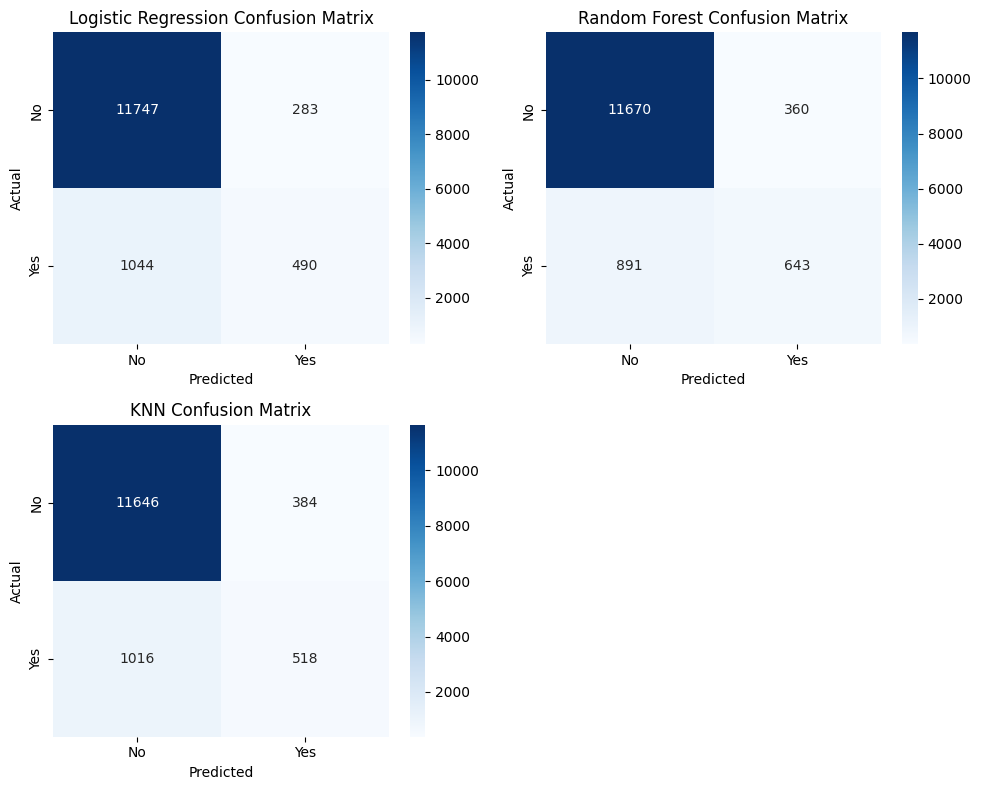

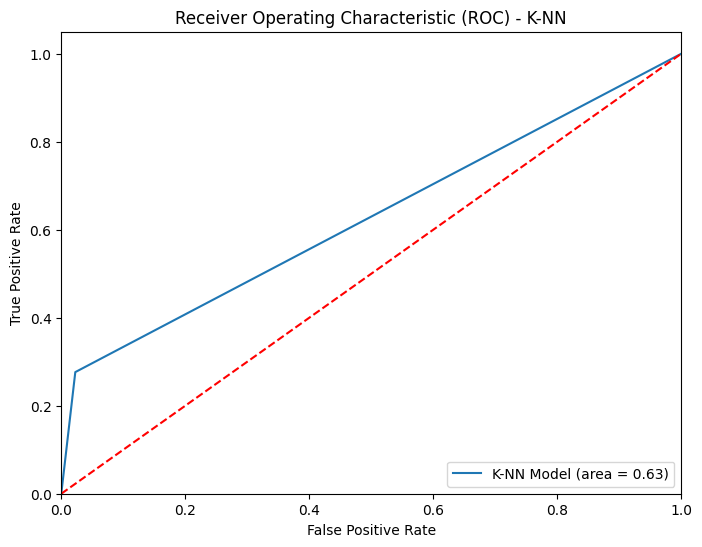

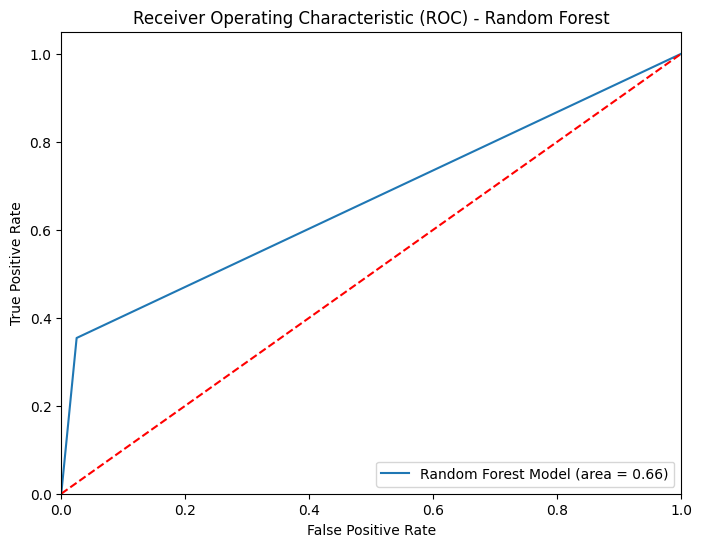

In [ ]:
cm_labels = ['No', 'Yes']

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='d', xticklabels=cm_labels, yticklabels=cm_labels)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 2)
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='d', xticklabels=cm_labels, yticklabels=cm_labels)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 3)
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='d', xticklabels=cm_labels, yticklabels=cm_labels)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curve - K-NN
plt.figure(figsize=(8, 6))
knn_fpr, knn_tpr, knn_threshold = metrics.roc_curve(y_test, Knn_y_pred)
knn_roc_auc = metrics.roc_auc_score(y_test, Knn_y_pred)
plt.plot(knn_fpr, knn_tpr, label='K-NN Model (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - K-NN')
plt.legend(loc="lower right")
plt.show()

# ROC Curve - Random Forest
plt.figure(figsize=(8, 6))
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, rf_y_pred)
rf_roc_auc = metrics.roc_auc_score(y_test, rf_y_pred)
plt.plot(rf_fpr, rf_tpr, label='Random Forest Model (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

##Accuracy Visualization

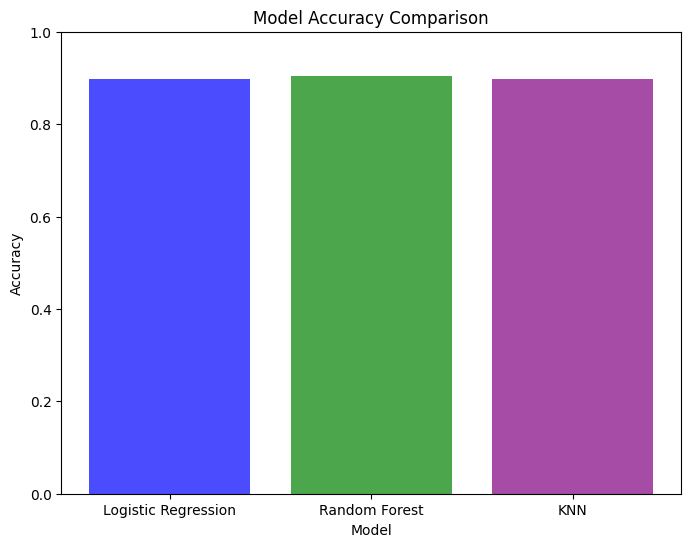

In [ ]:
models = ['Logistic Regression', 'Random Forest', 'KNN']
accuracy_scores = [lr_accuracy, rf_accuracy, knn_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, alpha=0.7, color=['blue', 'green', 'purple'])
plt.ylim([0.0, 1.0])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

##Parameter tuning

In [236]:
lr_param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2']
}

lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, n_jobs=-1)
lr_grid_search.fit(X_train, y_train)

lr_best_params = lr_grid_search.best_params_
lr_best_score = lr_grid_search.best_score_

lr_model = LogisticRegression(**lr_best_params)
lr_model.fit(X_train, y_train)

lr_y_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_cm = confusion_matrix(y_test, lr_y_pred)
lr_report = classification_report(y_test, lr_y_pred)

In [237]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf_random_search = RandomizedSearchCV(RandomForestClassifier(), rf_param_grid, n_jobs=-1)
rf_random_search.fit(X_train, y_train)

rf_best_params = rf_random_search.best_params_
rf_best_score = rf_random_search.best_score_

rf_model = RandomForestClassifier(**rf_best_params)
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)


In [238]:
# Define the parameter grid for K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

knn_best_params = knn_grid_search.best_params_
knn_best_score = knn_grid_search.best_score_

knn_model = KNeighborsClassifier(**knn_best_params)
knn_model.fit(X_train, y_train)

knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred)


In [239]:
# Print the results
print("Logistic Regression - Best Accuracy:", lr_best_score)
print("Logistic Regression - Accuracy:", lr_accuracy)
print("Logistic Regression - F1 Score:", lr_f1)
print("Logistic Regression - Precision Score:", lr_precision)
print("Logistic Regression - recall Score:", lr_recall)
print("Logistic Regression - Confusion Matrix:")
print(lr_cm)
print("Logistic Regression - Classification Report:")
print(lr_report)

print("Random Forest - Best Accuracy:", rf_best_score)
print("Random Forest - Accuracy:", rf_accuracy)
print("Random Forest - F1 Score:", rf_f1)
print("Random Forest - Precision Score:", rf_precision)
print("Random Forest - recall Score:", rf_recall)
print("Random Forest - Confusion Matrix:")
print(rf_cm)
print("Random Forest - Classification Report:")
print(rf_report)

print("KNN - Best Accuracy:", knn_best_score)
print("KNN - Accuracy:", knn_accuracy)
print("KNN - F1 Score:", knn_f1)
print("KNN - Precision Score:", knn_precision)
print("KNN - recall Score:", knn_recall)
print("KNN - Confusion Matrix:")
print(knn_cm)
print("KNN - Classification Report:")
print(knn_report)

Logistic Regression - Best Accuracy: 0.8987898679490606
Logistic Regression - Accuracy: 0.9021675022117369
Logistic Regression - F1 Score: 0.42479410489813607
Logistic Regression - Precision Score: 0.6338939197930142
Logistic Regression - recall Score: 0.3194263363754889
Logistic Regression - Confusion Matrix:
[[11747   283]
 [ 1044   490]]
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12030
           1       0.63      0.32      0.42      1534

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564

Random Forest - Best Accuracy: 0.9028028406565032
Random Forest - Accuracy: 0.9050427602477146
Random Forest - F1 Score: 0.45144804088586027
Random Forest - Precision Score: 0.6511056511056511
Random Forest - recall Score: 0.3455019556714472
Random Forest - Confusion Matrix:
[[11746  